In [170]:
from google.cloud import bigquery
import os

path = "/content/credentials.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = path

client = bigquery.Client()
dataset_ref = client.dataset("iowa_liquor_sales", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)
table_ref = dataset_ref.table("sales")
table = client.get_table(table_ref)

df = client.list_rows(table=table, max_results=3000000).to_dataframe()




Let's take a look on data

In [171]:
df.head(30)


,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-29710100033,2020-08-25,2665,Hy-Vee / Waukee,1005 E Hickman Rd,Waukee,50263,POINT (-93.854477 41.615059),25,DALLAS,1081100,Coffee Liqueurs,370,PERNOD RICARD USA,67522,Kahlua Coffee Mini,12,50,6.60,9.90,2,19.80,0.10,0.02
1,S28766800075,2015-10-29,2627,Hy-Vee Wine and Spirits #1,3424 MARTIN LUTHER KING JR PKW,DES MOINES,50310,POINT (-93.65129 41.626668),77,Polk,1081030,COFFEE LIQUEURS,370,Pernod Ricard USA/Austin Nichols,67526,Kahlua Coffee Liqueur,12,750,11.99,17.99,36,647.64,27.00,7.13
2,INV-21177600024,2019-08-12,2465,Sid's Beverage Shop,2727 Dodge St,Dubuque,52003,POINT (-90.705328 42.491862),31,DUBUQUE,1081100,Coffee Liqueurs,065,Jim Beam Brands,67557,Kamora Coffee Liqueur,12,1000,8.39,12.59,6,75.54,6.00,1.58
3,INV-21158400005,2019-08-12,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619787 41.60566),77,POLK,1082100,Imported Cordials & Liqueur,421,SAZERAC COMPANY INC,964039,SOOH Aalborg Taffel Aquavit,6,750,11.00,16.50,30,495.00,22.50,5.94
4,S23027000038,2014-12-18,3678,"Smoke Shop, The",1918 SE 14TH ST,DES MOINES,50320,POINT (-93.597011 41.570844),77,Polk,1701100,DECANTERS & SPECIALTY PACKAGES,420,"Moet Hennessy USA, Inc.",561,Ardbeg 10YR Exploration Pack,6,850,25.98,38.97,2,77.94,1.70,0.45
5,S25314400137,2015-04-27,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320,POINT (-93.596754 41.554101),77,Polk,1081700,DISTILLED SPIRITS SPECIALTY,421,"Sazerac Co., Inc.",77487,Tortilla Gold Dss,12,1000,4.51,6.77,48,324.96,48.00,12.68
6,S11773400003,2013-04-22,3820,"Charlie's Wine and Spirits,",507 W 19th St,SIOUX CITY,51103,POINT (-96.420193 42.510535),97,Woodbury,1081400,TRIPLE SEC,434,Luxco-St Louis,86251,Juarez Triple Sec,12,1000,2.21,3.31,48,158.88,48.00,12.68
7,S22784200001,2014-12-08,3644,Wal-Mart 2764 / Altoona,3501 8TH ST SW,ALTOONA,50009,POINT (-93.505276 41.644195),77,Polk,1701100,DECANTERS & SPECIALTY PACKAGES,305,MHW Ltd,40614,Rumchata w/Thermal Cup,6,750,12.50,18.75,30,562.50,22.50,5.94
8,S08912500001,2012-11-13,4576,THE BOONEDOCKS,228 N HWY 71,ARNOLDS PARK,51331,POINT (-95.125928 43.370941),30,Dickinson,1011500,STRAIGHT RYE WHISKIES,255,Wilson Daniels Ltd.,27102,Templeton Rye,6,750,18.08,27.13,18,488.34,13.50,3.57
9,INV-23602600014,2019-12-02,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,None,11,BUENA VIST,1062100,Gold Rum,035,BACARDI USA INC,43037,Bacardi Gold,12,1000,9.50,14.25,2,28.50,2.00,0.52


In [172]:
df.describe()


,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,3.000000e+06,3.000000e+06,2.999998e+06,2.999998e+06,3.000000e+06,2.999998e+06,3.000000e+06,3.000000e+06
mean,1.227861e+01,9.214285e+02,9.905795e+00,1.487315e+01,1.054028e+01,1.371533e+02,9.423947e+00,2.488150e+00
std,7.731639e+00,7.535907e+02,1.229157e+01,1.843689e+01,2.811279e+01,4.749231e+02,3.367423e+01,8.895850e+00
min,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e-02,0.000000e+00
25%,6.000000e+00,7.500000e+02,5.500000e+00,8.250000e+00,3.000000e+00,3.240000e+01,1.750000e+00,4.600000e-01
50%,1.200000e+01,7.500000e+02,8.000000e+00,1.200000e+01,6.000000e+00,7.200000e+01,6.000000e+00,1.590000e+00
75%,1.200000e+01,1.000000e+03,1.199000e+01,1.799000e+01,1.200000e+01,1.403400e+02,1.050000e+01,2.770000e+00
max,3.360000e+02,3.780000e+05,6.100000e+03,9.150000e+03,7.632000e+03,1.819620e+05,7.632000e+03,2.016160e+03


In [173]:
df.columns.tolist()

['invoice_and_item_number',
 'date',
 'store_number',
 'store_name',
 'address',
 'city',
 'zip_code',
 'store_location',
 'county_number',
 'county',
 'category',
 'category_name',
 'vendor_number',
 'vendor_name',
 'item_number',
 'item_description',
 'pack',
 'bottle_volume_ml',
 'state_bottle_cost',
 'state_bottle_retail',
 'bottles_sold',
 'sale_dollars',
 'volume_sold_liters',
 'volume_sold_gallons']

# Data Cleaning

In [174]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from plotly.offline import init_notebook_mode, iplot
%matplotlib inline

In [175]:
df.dtypes

invoice_and_item_number     object
date                        object
store_number                object
store_name                  object
address                     object
city                        object
zip_code                    object
store_location              object
county_number               object
county                      object
category                    object
category_name               object
vendor_number               object
vendor_name                 object
item_number                 object
item_description            object
pack                         int64
bottle_volume_ml             int64
state_bottle_cost          float64
state_bottle_retail        float64
bottles_sold                 int64
sale_dollars               float64
volume_sold_liters         float64
volume_sold_gallons        float64
dtype: object

In [176]:
df['city'].value_counts()

Des Moines          137481
DES MOINES          119954
Cedar Rapids        105226
CEDAR RAPIDS         88848
Davenport            69198
                     ...  
RUNNELLS                10
LOHRVILLE                8
Colesburg                4
ALVORD                   2
Colorado Springs         1
Name: city, Length: 837, dtype: int64

##### We can see that there are register problem in the data

In [177]:
df['city'] = df['city'].str.lower()
print(df['city'].nunique())
df['city'].value_counts()


456


des moines          257435
cedar rapids        194074
davenport           130599
waterloo             95650
council bluffs       88141
                     ...  
rudd                    20
wyoming                 19
earling                 17
alvord                   2
colorado springs         1
Name: city, Length: 456, dtype: int64

##### Let's do it for "same" columns

In [178]:
def register_preprocess(columns, df):
  for col in columns:
    df[col] = df[col].str.lower()
  return df

In [179]:
columns = ['city', 'category_name', 'item_description', 'county', 'vendor_name']

In [180]:
df = register_preprocess(columns=columns, df=df)

##### Double check

In [181]:
df['category_name'].value_counts()

canadian whiskies                  320151
american vodkas                    249665
vodka 80 proof                     210629
spiced rum                         170585
blended whiskies                   143650
                                    ...  
delisted items                          6
high proof beer - american              4
temporary  & specialty packages         4
schnapps - imported                     3
imported vodka - cherry                 2
Name: category_name, Length: 108, dtype: int64

##### Lets calculate amount of missing values

In [182]:
df.isnull().sum()

invoice_and_item_number         0
date                            0
store_number                    0
store_name                      0
address                     12072
city                        12072
zip_code                    12078
store_location             286797
county_number               23669
county                      23668
category                     2820
category_name                4143
vendor_number                   0
vendor_name                     0
item_number                     0
item_description                0
pack                            0
bottle_volume_ml                0
state_bottle_cost               2
state_bottle_retail             2
bottles_sold                    0
sale_dollars                    2
volume_sold_liters              0
volume_sold_gallons             0
dtype: int64

##### Let's delete column 'store location'. This column is useless for our analysis and also contains a lot of missing values. Also we don't need "volume sold gallons" column because we have same information in "volume sold liters" column.

In [183]:
df = df.drop(['store_location','volume_sold_gallons'], 1)
df.isnull().sum()

invoice_and_item_number        0
date                           0
store_number                   0
store_name                     0
address                    12072
city                       12072
zip_code                   12078
county_number              23669
county                     23668
category                    2820
category_name               4143
vendor_number                  0
vendor_name                    0
item_number                    0
item_description               0
pack                           0
bottle_volume_ml               0
state_bottle_cost              2
state_bottle_retail            2
bottles_sold                   0
sale_dollars                   2
volume_sold_liters             0
dtype: int64

##### There are also missed values in other columns. Their amount relatively to size of the dataset is quite low thats why we can just delete rows which contain missing values.
##### If percentage of those values would be higher we could use hand-made dictionary or replace them on random value from distribution of values

In [184]:
df.shape

(3000000, 22)

In [185]:
df.dropna(inplace = True)
df.shape

(2972252, 22)

##### We can preprocess data entries and separate them to 3 distinct columns.

In [186]:
df['date'] = pd.to_datetime(df['date'])

In [187]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [188]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month,day
0,INV-29710100033,2020-08-25,2665,Hy-Vee / Waukee,1005 E Hickman Rd,waukee,50263,25,dallas,1081100,coffee liqueurs,370,pernod ricard usa,67522,kahlua coffee mini,12,50,6.60,9.90,2,19.80,0.1,2020,8,25
1,S28766800075,2015-10-29,2627,Hy-Vee Wine and Spirits #1,3424 MARTIN LUTHER KING JR PKW,des moines,50310,77,polk,1081030,coffee liqueurs,370,pernod ricard usa/austin nichols,67526,kahlua coffee liqueur,12,750,11.99,17.99,36,647.64,27.0,2015,10,29
2,INV-21177600024,2019-08-12,2465,Sid's Beverage Shop,2727 Dodge St,dubuque,52003,31,dubuque,1081100,coffee liqueurs,065,jim beam brands,67557,kamora coffee liqueur,12,1000,8.39,12.59,6,75.54,6.0,2019,8,12
3,INV-21158400005,2019-08-12,2190,"Central City Liquor, Inc.",1460 2ND AVE,des moines,50314,77,polk,1082100,imported cordials & liqueur,421,sazerac company inc,964039,sooh aalborg taffel aquavit,6,750,11.00,16.50,30,495.00,22.5,2019,8,12
4,S23027000038,2014-12-18,3678,"Smoke Shop, The",1918 SE 14TH ST,des moines,50320,77,polk,1701100,decanters & specialty packages,420,"moet hennessy usa, inc.",561,ardbeg 10yr exploration pack,6,850,25.98,38.97,2,77.94,1.7,2014,12,18


##### time frame of data

In [189]:
print(df['date'].min())
print(df['date'].max())

2012-01-03 00:00:00
2020-10-30 00:00:00


### Basic analysis

In [190]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month,day
0,12,50,6.60,9.90,2,19.80,0.1,2020,8,25
1,12,750,11.99,17.99,36,647.64,27.0,2015,10,29
2,12,1000,8.39,12.59,6,75.54,6.0,2019,8,12
3,6,750,11.00,16.50,30,495.00,22.5,2019,8,12
4,6,850,25.98,38.97,2,77.94,1.7,2014,12,18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36124e5978>,
      dtype=object)

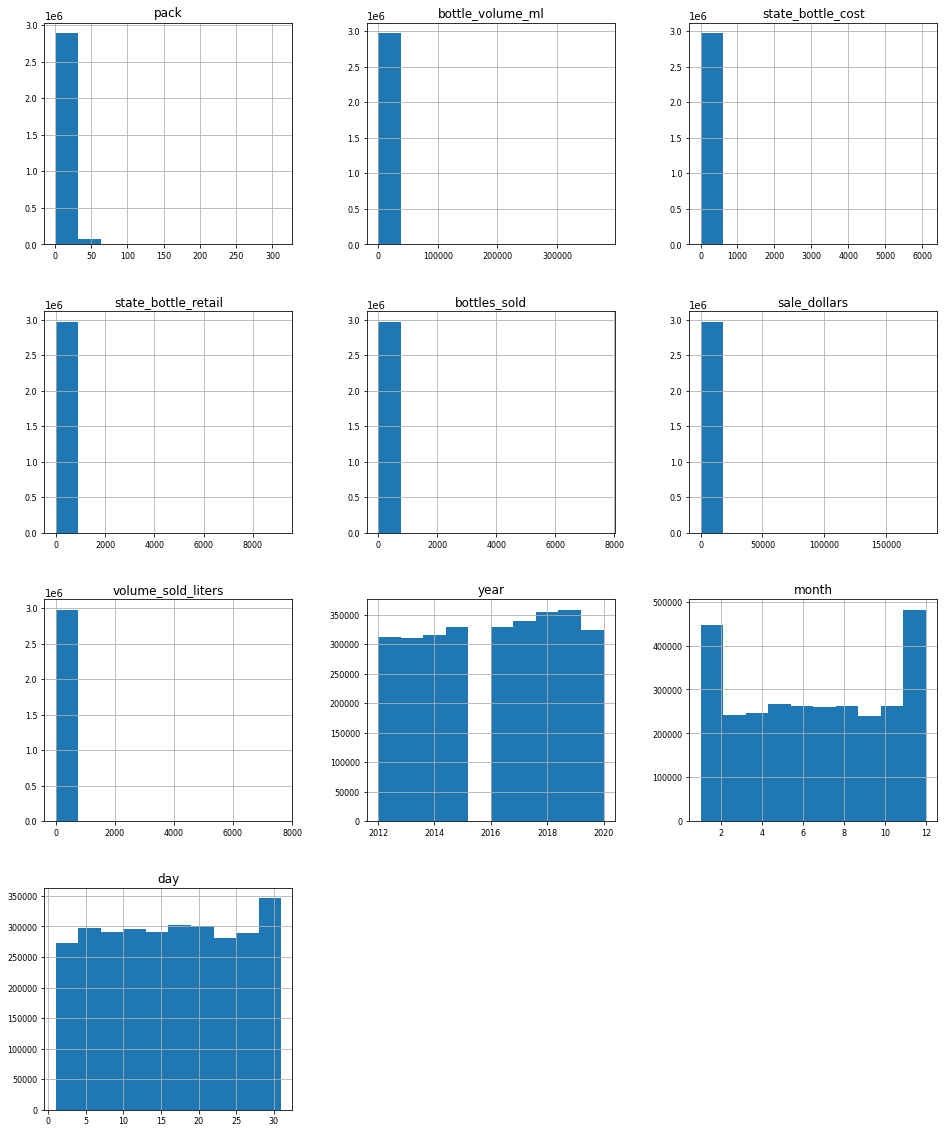

In [191]:
df_num.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8)

Lets see on 'bottle_volume_ml' values. There are few outliers.

In [192]:
df_num['bottle_volume_ml'].value_counts()

750       1299289
1750       620952
1000       402433
375        303840
200        105978
500        104857
50          47079
600         32869
300         15695
3000        15605
100         15390
800          3258
1200         1879
2400         1184
850           301
400           240
6000          181
1850          177
900           112
150           101
250            99
1950           88
4800           86
20             84
950            79
1125           64
502            63
1800           56
3500           55
2250           28
301            20
603            16
1500           16
3600           15
25             14
31500           8
378000          6
4500            5
2550            5
1420            4
3900            4
2000            4
2125            3
140000          2
175             2
425             2
355             1
7580            1
180000          1
15              1
Name: bottle_volume_ml, dtype: int64

##### Most likely it's not possible to have 378l or 140l bottles. So it's outlier and we have to implement function to delete outliers

In [193]:
df_num.loc[df_num.bottle_volume_ml == 140000]

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month,day
2154,1,140000,1599.2,2398.8,1,2398.8,140.0,2014,2,26
1662484,1,140000,1599.2,2398.8,1,2398.8,140.0,2014,2,26


In [194]:
def treshold(col, df_num):
  q1 = df_num[col].quantile([0.25]).values[0]
  q3 = df_num[col].quantile([0.75]).values[0]
  IRQ = q3 - q1
  df_num = df_num[(df_num[col] >= q1 - IRQ*1.5) & (df_num[col] <= q3 + IRQ*1.5)]
  return df_num


In [195]:

df_num = treshold(col = 'bottle_volume_ml', df_num=df_num)
df_num.head()




,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month,day
1,12,750,11.99,17.99,36,647.64,27.0,2015,10,29
2,12,1000,8.39,12.59,6,75.54,6.0,2019,8,12
3,6,750,11.00,16.50,30,495.00,22.5,2019,8,12
4,6,850,25.98,38.97,2,77.94,1.7,2014,12,18
5,12,1000,4.51,6.77,48,324.96,48.0,2015,4,27


In [196]:
mn = min(df_num['bottle_volume_ml'].value_counts().index)
mx = max(df_num['bottle_volume_ml'].value_counts().index)
df_num['bottle_volume_ml'].value_counts()

750     1299289
1000     402433
375      303840
500      104857
600       32869
800        3258
1200       1879
850         301
400         240
900         112
950          79
1125         64
502          63
603          16
425           2
Name: bottle_volume_ml, dtype: int64

##### Now lets see distribution of values in this columns after transform

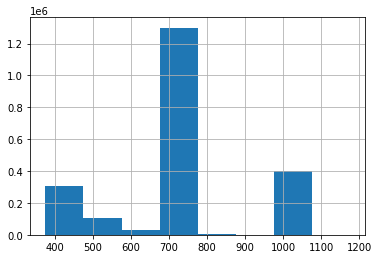

In [197]:
df_num['bottle_volume_ml'].hist(bins=[i for i in range(mn,mx,100)])

##### Let's check other columns


In [198]:
df_num.bottles_sold.value_counts()

12      721757
2       319335
1       256277
3       252620
6       180232
         ...  
87           1
89           1
208          1
2895         1
2040         1
Name: bottles_sold, Length: 244, dtype: int64

In [199]:
df_num[df_num.bottles_sold==1020]

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month,day
601606,12,1000,3.97,5.96,1020,6079.2,1020.0,2016,12,26
1496560,12,750,16.50,24.75,1020,25245.0,765.0,2019,9,24
2264416,12,1000,3.97,5.96,1020,6079.2,1020.0,2020,2,12


##### Very expensive alcohol is possible so we will prefer to keep this info.


In [200]:
print(max(df_num.state_bottle_retail))
print(np.mean(df_num.state_bottle_retail))

9000.0
14.389273787401528


##### Transform bottle_volume_ml in original dataset

In [201]:
df = treshold(col = 'bottle_volume_ml', df_num=df)

##### Top 10 sales in dollars depending on category

In [202]:
df_plot = df.groupby(['category_name'])['sale_dollars'].sum().sort_values(ascending=False)
top_count = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(10))

In [203]:


fig_reg = px.bar(top_count1,x=top_count1.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per category",
    xaxis_title=" Category Name",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

###### Top 10 sales in dollars dependent on city

In [204]:
df_plot = df.groupby(['city'])['sale_dollars'].sum().sort_values(ascending=False)
top_count = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(10))


In [205]:
fig_reg = px.bar(top_count1,x=top_count1.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per city",
    xaxis_title=" city",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

In [206]:
def transform(a):
  return datetime.date(1900, a, 1).strftime('%B')

##### Distribution of sales during the year

In [207]:
df_plot = df.groupby(['month'])['sale_dollars'].sum().sort_values(ascending=False)
top_count = pd.DataFrame(df_plot)
new = []
for i in top_count.index:
  new.append(transform(i))

In [208]:
fig_reg = px.bar(top_count,x=new, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per month",
    xaxis_title=" Month",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

In [209]:
df_plot = df.groupby(['vendor_name'])['sale_dollars'].sum().sort_values(ascending=False)
top_count = pd.DataFrame(df_plot)
top_count1 = top_count.head(10)

In [210]:
fig_reg = px.bar(top_count1,x=top_count1.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per vendor_name",
    xaxis_title=" Vendor_name",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

##### Also we can take a look at daily sales data

In [211]:
daily_sales = df.groupby('date', as_index=False)['sale_dollars'].sum()

In [212]:
daily_sales_sc = go.Scatter(x=daily_sales['date'], y=daily_sales['sale_dollars'])
layout = go.Layout(title='Daily sales', xaxis=dict(title='date'), yaxis=dict(title='sales'))
fig = go.Figure(data=[daily_sales_sc], layout=layout)
iplot(fig)

In [213]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month,day
1,S28766800075,2015-10-29,2627,Hy-Vee Wine and Spirits #1,3424 MARTIN LUTHER KING JR PKW,des moines,50310,77,polk,1081030,coffee liqueurs,370,pernod ricard usa/austin nichols,67526,kahlua coffee liqueur,12,750,11.99,17.99,36,647.64,27.0,2015,10,29
2,INV-21177600024,2019-08-12,2465,Sid's Beverage Shop,2727 Dodge St,dubuque,52003,31,dubuque,1081100,coffee liqueurs,065,jim beam brands,67557,kamora coffee liqueur,12,1000,8.39,12.59,6,75.54,6.0,2019,8,12
3,INV-21158400005,2019-08-12,2190,"Central City Liquor, Inc.",1460 2ND AVE,des moines,50314,77,polk,1082100,imported cordials & liqueur,421,sazerac company inc,964039,sooh aalborg taffel aquavit,6,750,11.00,16.50,30,495.00,22.5,2019,8,12
4,S23027000038,2014-12-18,3678,"Smoke Shop, The",1918 SE 14TH ST,des moines,50320,77,polk,1701100,decanters & specialty packages,420,"moet hennessy usa, inc.",561,ardbeg 10yr exploration pack,6,850,25.98,38.97,2,77.94,1.7,2014,12,18
5,S25314400137,2015-04-27,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,des moines,50320,77,polk,1081700,distilled spirits specialty,421,"sazerac co., inc.",77487,tortilla gold dss,12,1000,4.51,6.77,48,324.96,48.0,2015,4,27


##### markup

In [214]:
m_u = df['state_bottle_retail'] / df['state_bottle_cost']
m_u.mean()

1.501627721496729

### Assumptions about valuable information, which can be extracted and presented for business.

We already found some useful info : from plots above we can see that diageo americas is most popular vendor_name in terms of sales; october and december are most popular months to buy liquors, probably because people preparing for holidays and liquers are integral part of holidays for most people; types of most profitable types of liquers. 

Also we could extract information about placement of best stores : are they near campuses or big centers.

